# Brain Stroke Detection using Machine Learning 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = df.drop('id', axis="columns")

In [4]:
df.shape

(5110, 11)

In [5]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Missing Values Imputation

In [6]:
df.isnull().mean()*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [8]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
df["bmi"].median()

28.1

In [10]:
# filling the missing values with median imputation since the missing values are less
df['bmi'] = df.bmi.fillna(df["bmi"].median())

In [11]:
df.isnull().mean()

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### Numerical Feature analysis

In [12]:
def plot_numerical_feature(df, feature):
    sns.histplot(data=df, x = feature,  hue='stroke')
    plt.title(feature)
    plt.show()

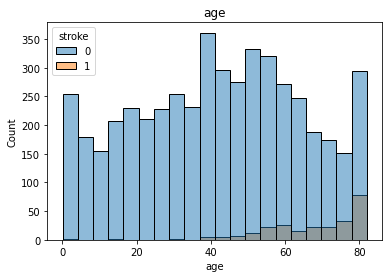

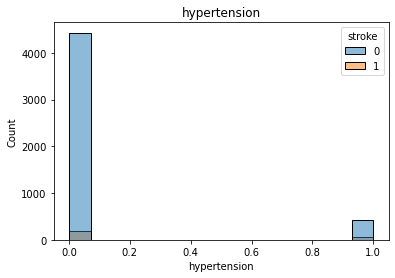

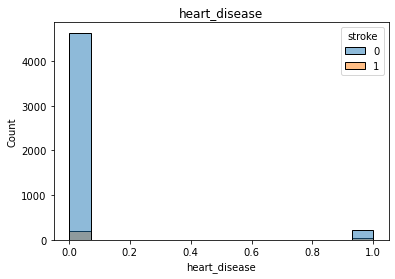

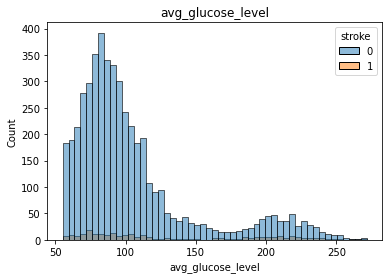

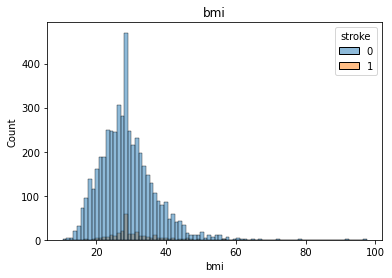

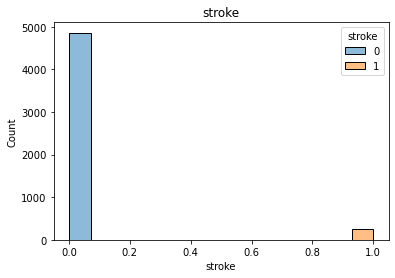

In [13]:
for i, feature in enumerate(numerical_features):
    try:
        plot_numerical_feature(df, feature)
    except Exception as e:
        print(e)

### Categorical Features Analysis

In [14]:
for feature in categorical_features:
    print(feature, df[feature].value_counts())
    print('---------------------------------')

gender Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
---------------------------------
ever_married Yes    3353
No     1757
Name: ever_married, dtype: int64
---------------------------------
work_type Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
---------------------------------
Residence_type Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
---------------------------------
smoking_status never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
---------------------------------


In [15]:
def plot_categorical_feature(df, feature, title, x_label, y_label):
    sns.countplot(df[feature], data = df, color='orange',palette='Paired', hue='stroke')
    plt.title(title, size = 20, color = 'indigo')
    plt.xlabel(x_label, size = 15, color = 'coral')
    plt.ylabel(y_label, size=15, color = 'peru')
    plt.show

In [16]:
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


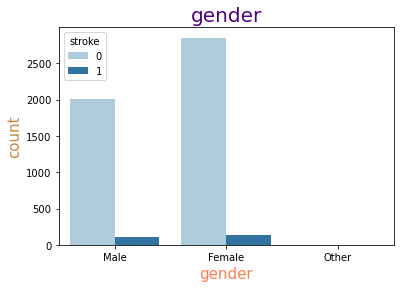

In [17]:
plot_categorical_feature(df, 'gender', 'gender', 'gender', 'count')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


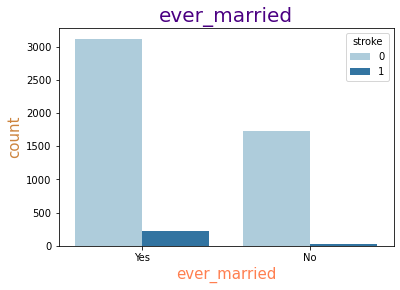

In [18]:
plot_categorical_feature(df, 'ever_married', 'ever_married', 'ever_married', 'count')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


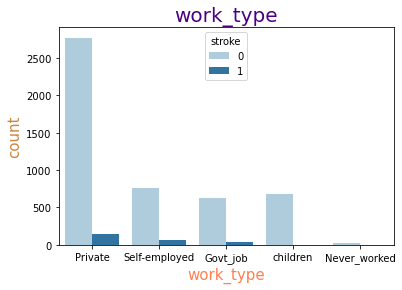

In [19]:
plot_categorical_feature(df, 'work_type', 'work_type', 'work_type', 'count')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


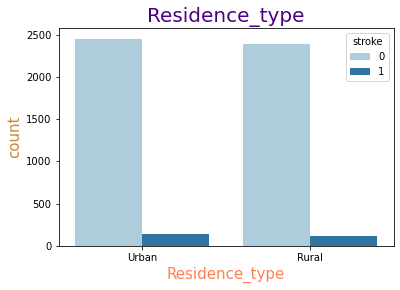

In [20]:
plot_categorical_feature(df, 'Residence_type', 'Residence_type', 'Residence_type', 'count')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


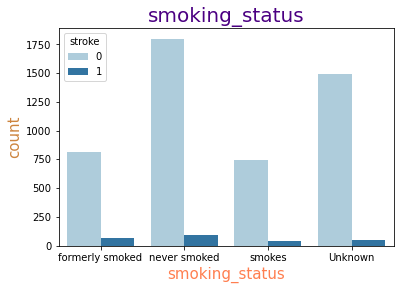

In [21]:
plot_categorical_feature(df, 'smoking_status', 'smoking_status', 'smoking_status', 'count')

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [24]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [25]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [26]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### One Hot Encoding 

#### Label Encoding 

In [27]:
filt = df[df["gender"] == "Other"].index
df.drop(index=filt, axis="row", inplace=True)

In [28]:
gender_map = {"Male":1, "Female":0}
residence_map = {"Urban":0, "Rural":1}
married_map ={"Yes":1, "No":0}

In [29]:
df["gender"] = df["gender"].apply(lambda x : gender_map[x])
df["Residence_type"] = df["Residence_type"].map(residence_map)
df["ever_married"] = df["ever_married"].map(married_map)

In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,1,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1


In [31]:
df.isnull().mean()

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [32]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [33]:
df1 = pd.get_dummies(df)

In [34]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,1,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [35]:
df1.shape

(5109, 18)

### Handling the Imbalanced Dataset

#### Oversampling

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


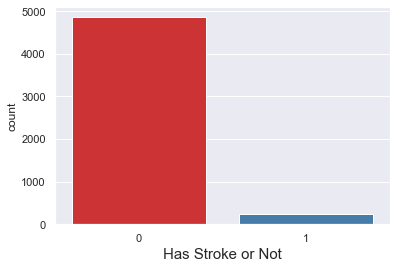

In [36]:
sns.set_theme(style="darkgrid")
sns.countplot(df1['stroke'], palette='Set1')
plt.xlabel('Has Stroke or Not', size = 15)
plt.show()

In [37]:
df1["age"] = df1["age"].apply(lambda x : int(x))
df1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61,0,0,1,1,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,1,80,0,1,1,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49,0,0,1,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79,1,0,1,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [38]:
X = df1.drop("stroke", axis="columns")
y = df1["stroke"]

In [39]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
sampled_X, sampled_y = smk.fit_resample(X, y)

In [40]:
sampled_X.shape

(9636, 17)

In [41]:
sampled_y.value_counts()

1    4818
0    4818
Name: stroke, dtype: int64

### Logistic Regression

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [50]:
cols_with_uint8 = [col for col in sampled_X.columns if sampled_X[col].dtype == "uint8"]
print(cols_with_uint8)

['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [53]:
for col in cols_with_uint8:
    sampled_X[col] = sampled_X[col].astype("int64")

In [57]:
lr_score = cross_val_score(LogisticRegression(solver='liblinear'), sampled_X, sampled_y, cv=10)
lr_score.max()

0.9491173416407062

### Decision Tree

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(sampled_X, sampled_y)
clf.cv_results_

{'mean_fit_time': array([0.02589793, 0.03101699]),
 'std_fit_time': array([0.00242753, 0.00077158]),
 'mean_score_time': array([0.00230234, 0.00187435]),
 'std_score_time': array([0.0004583 , 0.00030118]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.81742739, 0.81639004]),
 'split1_test_score': array([0.9626556 , 0.96991701]),
 'split2_test_score': array([0.95020747, 0.95124481]),
 'split3_test_score': array([0.95020747, 0.95954357]),
 'split4_test_score': array([0.95850622, 0.95746888]),
 'split5_test_score': array([0.96058091, 0.96680498]),
 'split6_test_score': array([0.95327103, 0.96053998]),
 'split7_test_score': array([0.96261682, 0.96884735]),
 'split8_test_score': array([0.96573209, 0.96261682]),
 'split9_test_score': array([0.95742471, 0.96053998]),
 'mean_test_score': array([0.9438629

In [43]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df[['param_criterion', 'mean_test_score']]

,param_criterion,mean_test_score
0,gini,0.943863
1,entropy,0.947391


### Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[ 10, 20, 30, 35, 40, 45]}, cv=10, return_train_score=False)
rf_clf.fit(sampled_X, sampled_y)
rf_result_df = pd.DataFrame(rf_clf.cv_results_)
rf_result_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,10,0.966072
1,20,0.969185
2,30,0.969807
3,35,0.969807
4,40,0.969497
5,45,0.970015


### Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm_clf = GridSearchCV(SVC(), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=10, return_train_score=False)
svm_clf.fit(sampled_X, sampled_y)
svm_result_df = pd.DataFrame(svm_clf.cv_results_)
svm_result_df[['param_C', 'param_kernel', 'mean_test_score']]

### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1, 3, 5, 7, 9, 10, 12, 13, 14, 16, 20, 23, 25, 28, 30]}, cv=12, return_train_score=False)
knn_clf.fit(sampled_X, sampled_y)
knn_results_df = pd.DataFrame(knn_clf.cv_results_)
knn_results_df[["param_n_neighbors", "mean_test_score" ]]

,param_n_neighbors,mean_test_score
0,1,0.930988
1,3,0.907223
2,5,0.895807
3,7,0.887609
4,9,0.882109
5,10,0.887194
6,12,0.878892
7,13,0.868618
8,14,0.871939
9,16,0.866853


### Saving the model

In [47]:
model = RandomForestClassifier(n_estimators=45)
model.fit(sampled_X, sampled_y)

RandomForestClassifier(n_estimators=45)

In [50]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))